In [84]:
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utils
import matplotlib.pyplot as plt
from consts import sensor_lat as lat
from consts import sensor_log as log
from consts import valid_sensor_res_10 as valid_sensor_list
from consts import valid_sensor_res_10_old as valid_sensor_list_old
from consts import sensor_day_seconds as day_seconds
from consts import sensor_week_seconds as week_seconds 
from consts import sensor_start_time_unix as start_time
from consts import sensor_end_time_unix as end_timez
from consts import sensor_epoch_length as epoch_length
from consts import loc_pic
from consts import drop_list
import consts
from numpy import array
import time
import pickle
import copy

In [2]:
unix_column = 'Time since the epoch [s]'
idd = 'Station ID'
a_temperature = 'Ambient Temperature'
s_temperature = 'Surface Temperature'

In [3]:
def coverage_test(df,time_stamps,valid_sensor_list):
    error = 0
    diff_list = []
    # all_np_list = []
    sub_df_num  = 0
    for i in range(len(time_stamps)-1):
        # print(i)
        # print(time_stamps[i],time_stamps[i+1])
        sub_df = df[(df[unix_column] > time_stamps[i]) & (df[unix_column] < time_stamps[i+1])]
        sensor_list = sub_df[idd].values
        uniq = np.unique(sensor_list)
        diff = np.setdiff1d(valid_sensor_list,uniq)    
        # np_court = all_np(sensor_list)
        # all_np_list.append(np_court)
        error += len(diff)
        diff_list.append(len(diff))
        print(diff)
        sub_df_num += len(sub_df)
    print(sub_df_num/error)
    diff_list = np.array(diff_list)
    print("var: {0} \t std: {1} ".format(diff_list.var(),diff_list.std()))
    return error

In [4]:
df = pd.read_hdf('optimal.h5','optimal_df')

In [5]:
time_stamp = np.arange(start_time,end_time+epoch_length,epoch_length)

In [6]:
df

Station ID  Year  Month  Day  Hour  Minute  Second  \
319633           8  2007      3    1     0       0      27   
319634           8  2007      3    1     0       0      56   
319635           8  2007      3    1     0       1      25   
319636           8  2007      3    1     0       1      55   
319637           8  2007      3    1     0       2      24   
...            ...   ...    ...  ...   ...     ...     ...   
777546         121  2007      3    7    17      30      33   
777547         121  2007      3    7    17      30      43   
777548         121  2007      3    7    17      30      52   
777549         121  2007      3    7    17      31       2   
777550         121  2007      3    7    17      31      12   

        Time since the epoch [s]  Sequence Number  Ambient Temperature  \
319633                1172703627            35250                 8.10   
319634                1172703656            35251                 8.18   
319635                1172703685            35252                 8.20   
319636                1172703715            35253                 8.20   
319637                1172703744            35254                 8.12   
...                          ...              ...                  ...   
777546                1173285033            41669                10.23   
777547                1173285043            41670                10.26   
777548                1173285052            41671                10.27   
777549                1173285062            41672                10.28   
777550                1173285072            41673                10.26   

        Surface Temperature  Relative Humidity [%]  
319633                7.350                 81.956  
319634                7.350                 81.257  
319635                7.537                 81.141  
319636                7.412                 81.788  
319637                7.350                 83.592  
...                     ...                    ...  
777546               11.350                 67.417  
777547               11.412                 66.656  
777548               11.350                 66.795  
777549               11.225                 66.906  
777550               11.412                 66.711  

[944578 rows x 12 columns]

In [8]:
id_series = df[-df[idd].duplicated()][idd]

In [9]:
print(82 in id_array)

NameError: name 'id_array' is not defined

In [ ]:
id_array = id_series.to_numpy()

In [ ]:
np.setdiff1d(id_array,valid_sensor_list)

In [ ]:
print(df[a_temperature].isna().sum())
print(df[s_temperature].isna().sum())

In [ ]:
unix_series = df[unix_column]

In [ ]:
print(unix_series)

In [ ]:
uniq_unix_series = unix_series[-unix_series.duplicated()]

In [ ]:
uniq = uniq_unix_series.to_numpy()

In [ ]:
time_list = []
for i,time in enumerate(uniq_unix_series):
    num = len(df[unix_series == time])
    time_list.append(num)
    print(i,num)

In [ ]:
# 保存time_list ，大概每一秒有2个数据点更新
with open('time_list.pkl','wb') as output:
    pickle.dump(time_list,output)

In [ ]:
time_array = np.array(time_list)

In [ ]:
print("mean: {0} std:{1} var:{2} sum:{3}".format(time_array.mean(),time_array.std(),time_array.var(),time_array.sum()))

In [ ]:
np.setdiff1d(valid_sensor_list_old,valid_sensor_list)

# 尝试构建tensor

## 一个映射 （id 和 地理位置） tensor的函数

In [ ]:
print(loc_pic)

In [ ]:
loc = np.array(loc_pic).reshape(100)

In [ ]:
print(loc)

In [8]:
print(time_stamp.shape)

(337,)


In [9]:
sensing_epoch = []

In [10]:
def remove_duplicated(df):
    '''剔除dataframe中的重复项，以Station ID为基准'''
    sub_df = df[-df[idd].duplicated()]
    return sub_df

In [11]:
def dataframe_to_matrix(df,loc,drop_list):
    temper = np.copy(loc)
    # print(temper)
    temper = temper.reshape(100)
    for i in range(len(temper)):
        if int(temper[i]) != 0 and int(temper[i]) not in drop_list:
            v = df[df[idd] == temper[i]][a_temperature].values
            index = df[df[idd] == temper[i]].index.tolist()
            # print(temper[i],v)
            if len(v) == 1 and np.isnan(v[0]) == False:
                # print(v[0])
                temper[i] = v[0]
            else:
                temper[i] = 0
            # print(index)
            # print(df.loc(index,a_temperature))
        else:
            temper[i] = 0
    temper = temper.reshape(10,10)
    # print(temper)
    return temper

In [14]:
temper = dataframe_to_matrix(sub_df,loc_pic,drop_list)

In [15]:
temper

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 8.77, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 8.32, 7.88, 0.  , 0.  ],
       [0.  , 0.  , 8.94, 0.  , 8.79, 9.04, 9.18, 0.  , 0.  , 0.  ],
       [0.  , 8.91, 8.66, 9.3 , 0.  , 0.  , 8.73, 0.  , 8.96, 0.  ],
       [0.  , 8.72, 8.84, 0.  , 0.  , 0.  , 0.  , 8.11, 0.  , 0.  ],
       [9.04, 9.12, 8.88, 8.87, 0.  , 0.  , 0.  , 8.88, 8.74, 0.  ],
       [8.83, 8.95, 9.1 , 0.  , 0.  , 8.91, 8.96, 0.  , 8.15, 8.28],
       [9.28, 8.66, 0.  , 0.  , 8.94, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 9.01, 0.  , 0.  , 9.14, 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [93]:
temper

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 8.77, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 8.32, 7.88, 0.  , 0.  ],
       [0.  , 0.  , 8.94, 0.  , 8.79, 9.04, 9.18, 0.  , 0.  , 0.  ],
       [0.  , 8.91, 8.66, 9.3 , 0.  , 0.  , 8.73, 0.  , 8.96, 0.  ],
       [0.  , 8.72, 8.84, 0.  , 0.  , 0.  , 0.  , 8.11, 0.  , 0.  ],
       [9.04, 9.12, 8.88, 8.87,  nan, 0.  , 0.  , 8.88, 8.74, 0.  ],
       [8.83, 8.95, 9.1 , 0.  , 0.  , 8.91, 8.96, 0.  , 8.15, 8.28],
       [9.28, 8.66, 0.  , 0.  , 8.94, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 9.01, 0.  , 0.  , 9.14, 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [13]:
sub_df = remove_duplicated(df)

In [10]:
loc_pic = np.array(loc_pic)

In [40]:
dataframe_to_matrix(sub_df,loc_pic)

0
0
0
0
0
0
0
0
0
0
63
0
0
0
42
17
0
0
0
0
47
7
27
0
41
56
121
46
36
0
0
0
111
99
57
59
40
106
0
0
0
61
71
65
0
82
62
0
76
0
0
51
11
122
68
0
0
60
0
0
84
81
55
72
73
0
107
31
69
95
103
80
96
0
0
97
100
53
19
93
109
87
0
0
104
0
0
0
0
0
0
89
88
0
98
0
0
0
0
0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  63.   0.   0.   0.
  42.  17.   0.   0.   0.   0.  47.   7.  27.   0.  41.  56. 121.  46.
  36.   0.   0.   0. 111.  99.  57.  59.  40. 106.   0.   0.   0.  61.
  71.  65.   0.  82.  62.   0.  76.   0.   0.  51.  11. 122.  68.   0.
   0.  60.   0.   0.  84.  81.  55.  72.  73.   0. 107.  31.  69.  95.
 103.  80.  96.   0.   0.  97. 100.  53.  19.  93. 109.  87.   0.   0.
 104.   0.   0.   0.   0.   0.   0.  89.  88.   0.  98.   0.   0.   0.
   0.   0.]


In [87]:
temper_list = []
for i in range(len(time_stamp)-1):
    print(i,time_stamp[i],time_stamp[i+1])
    sub_df = df[(df[unix_column] > time_stamp[i]) & (df[unix_column] < time_stamp[i+1])]
    sub_df = remove_duplicated(sub_df)
    temper = dataframe_to_matrix(sub_df,loc_pic,drop_list)
    temper_list.append(temper)

0 1172703600 1172705400
1 1172705400 1172707200
2 1172707200 1172709000
3 1172709000 1172710800
4 1172710800 1172712600
5 1172712600 1172714400
6 1172714400 1172716200
7 1172716200 1172718000
8 1172718000 1172719800
9 1172719800 1172721600
10 1172721600 1172723400
11 1172723400 1172725200
12 1172725200 1172727000
13 1172727000 1172728800
14 1172728800 1172730600
15 1172730600 1172732400
16 1172732400 1172734200
17 1172734200 1172736000
18 1172736000 1172737800
19 1172737800 1172739600
20 1172739600 1172741400
21 1172741400 1172743200
22 1172743200 1172745000
23 1172745000 1172746800
24 1172746800 1172748600
25 1172748600 1172750400
26 1172750400 1172752200
27 1172752200 1172754000
28 1172754000 1172755800
29 1172755800 1172757600
30 1172757600 1172759400
31 1172759400 1172761200
32 1172761200 1172763000
33 1172763000 1172764800
34 1172764800 1172766600
35 1172766600 1172768400
36 1172768400 1172770200
37 1172770200 1172772000
38 1172772000 1172773800
39 1172773800 1172775600
40 1172775

In [43]:
sub_df = df[(df[unix_column] > 1173299400) & (df[unix_column] < 1173301200)]

In [48]:
print(end_time)

1173308400


In [45]:
df

Station ID  Year  Month  Day  Hour  Minute  Second  \
319633           8  2007      3    1     0       0      27   
319634           8  2007      3    1     0       0      56   
319635           8  2007      3    1     0       1      25   
319636           8  2007      3    1     0       1      55   
319637           8  2007      3    1     0       2      24   
...            ...   ...    ...  ...   ...     ...     ...   
777546         121  2007      3    7    17      30      33   
777547         121  2007      3    7    17      30      43   
777548         121  2007      3    7    17      30      52   
777549         121  2007      3    7    17      31       2   
777550         121  2007      3    7    17      31      12   

        Time since the epoch [s]  Sequence Number  Ambient Temperature  \
319633                1172703627            35250                 8.10   
319634                1172703656            35251                 8.18   
319635                1172703685            35252                 8.20   
319636                1172703715            35253                 8.20   
319637                1172703744            35254                 8.12   
...                          ...              ...                  ...   
777546                1173285033            41669                10.23   
777547                1173285043            41670                10.26   
777548                1173285052            41671                10.27   
777549                1173285062            41672                10.28   
777550                1173285072            41673                10.26   

        Surface Temperature  Relative Humidity [%]  
319633                7.350                 81.956  
319634                7.350                 81.257  
319635                7.537                 81.141  
319636                7.412                 81.788  
319637                7.350                 83.592  
...                     ...                    ...  
777546               11.350                 67.417  
777547               11.412                 66.656  
777548               11.350                 66.795  
777549               11.225                 66.906  
777550               11.412                 66.711  

[944578 rows x 12 columns]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

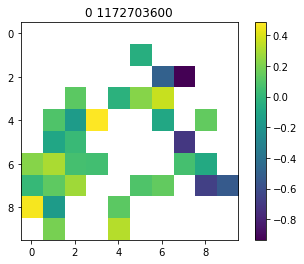

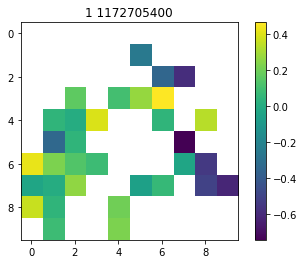

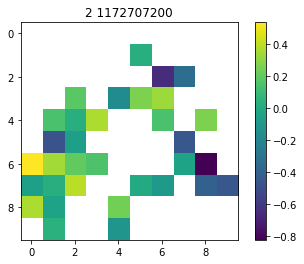

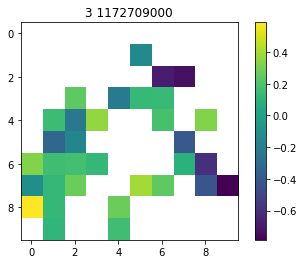

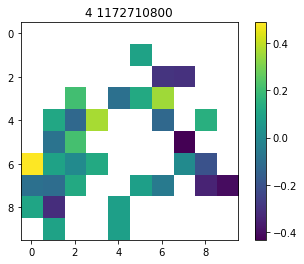

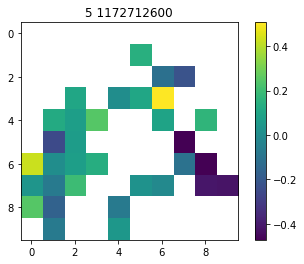

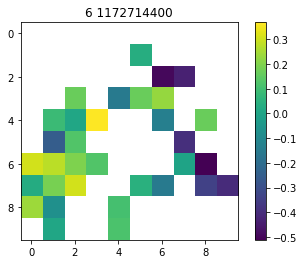

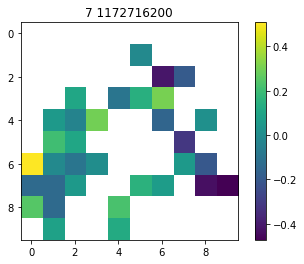

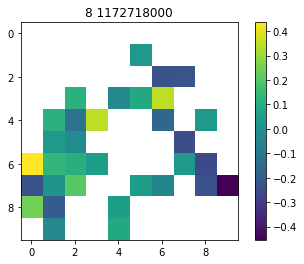

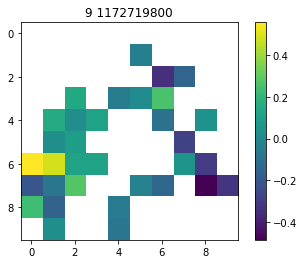

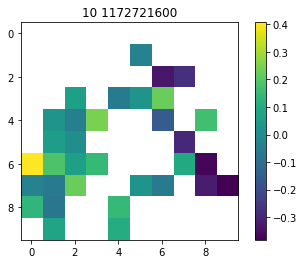

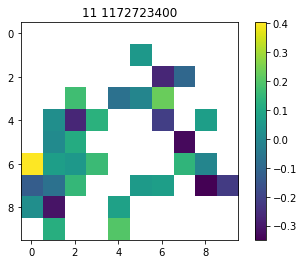

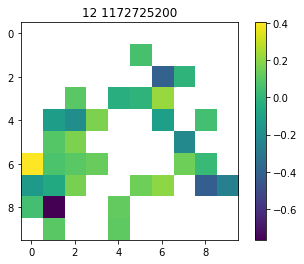

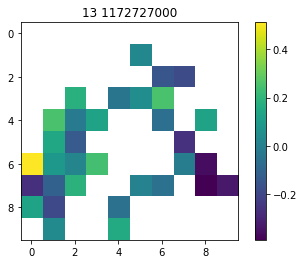

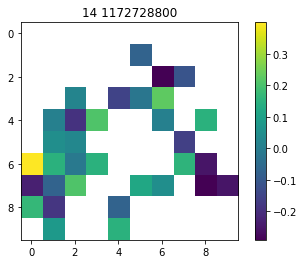

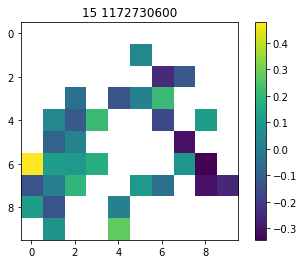

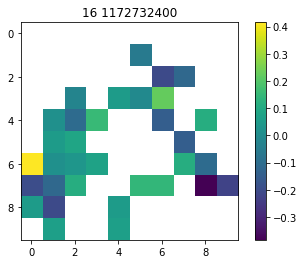

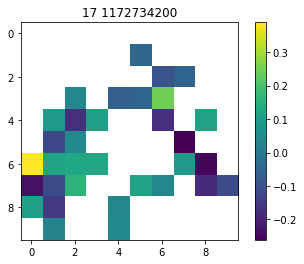

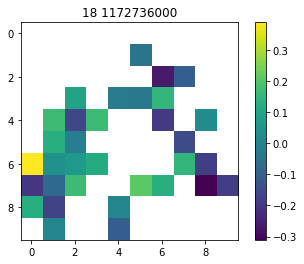

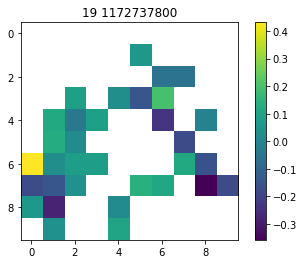

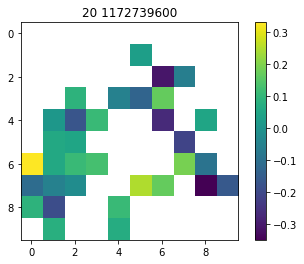

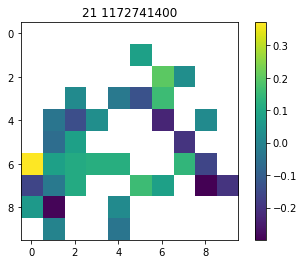

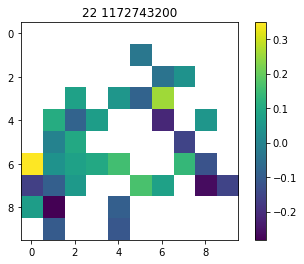

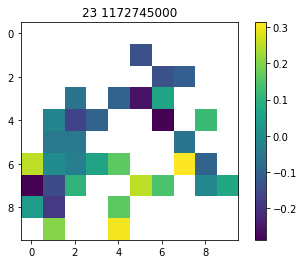

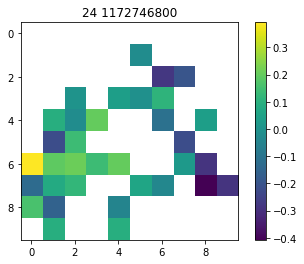

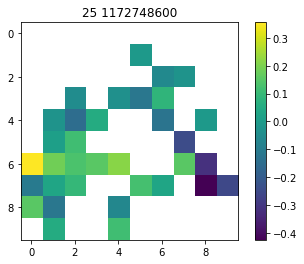

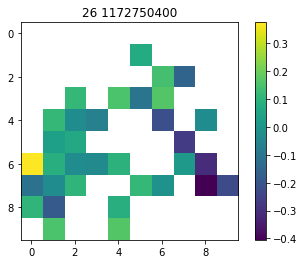

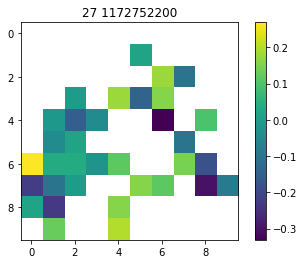

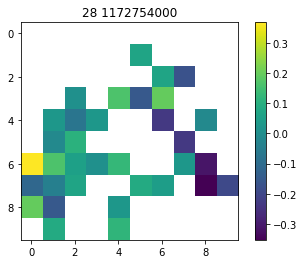

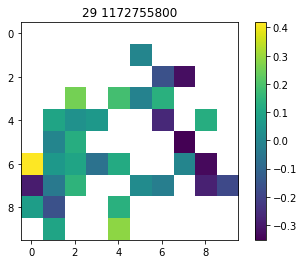

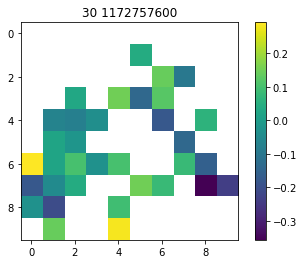

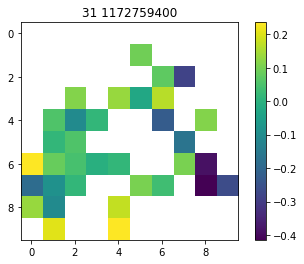

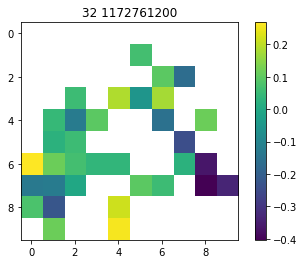

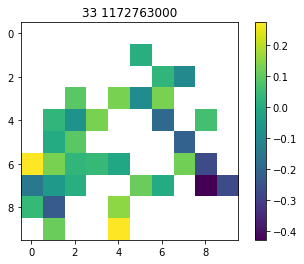

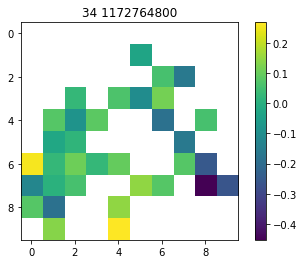

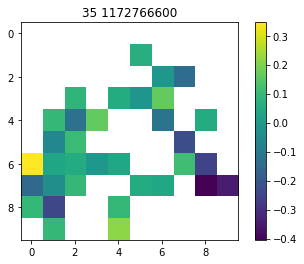

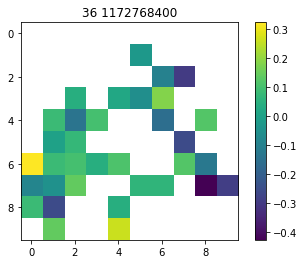

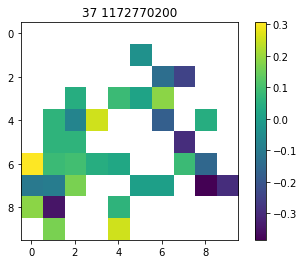

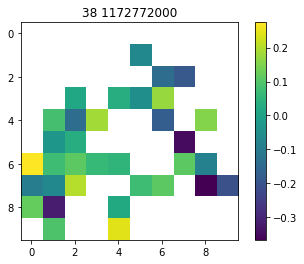

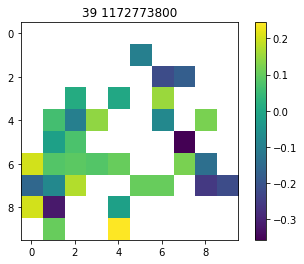

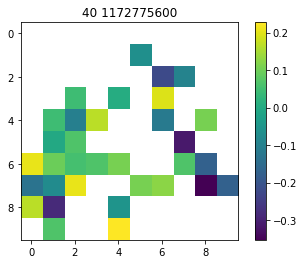

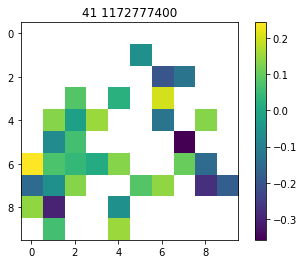

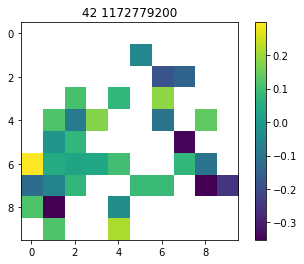

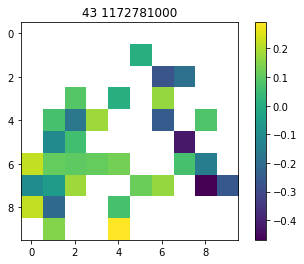

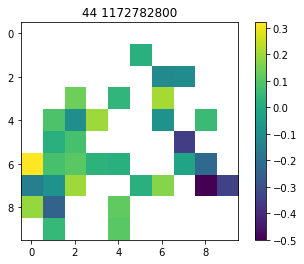

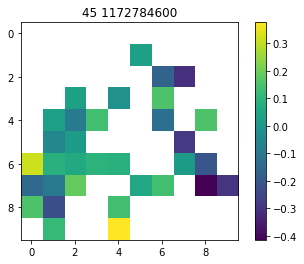

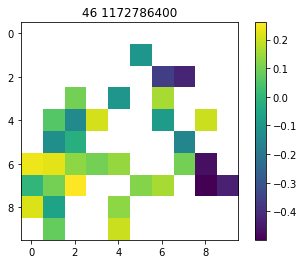

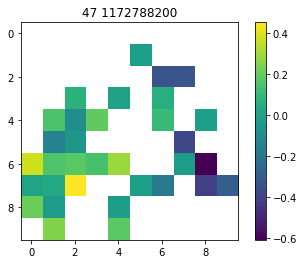

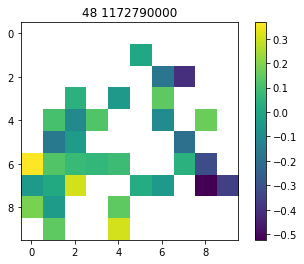

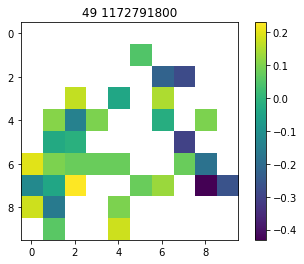

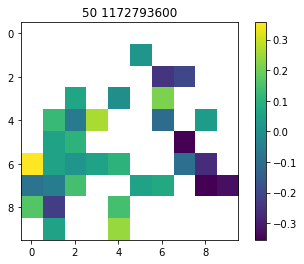

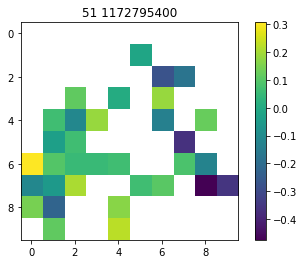

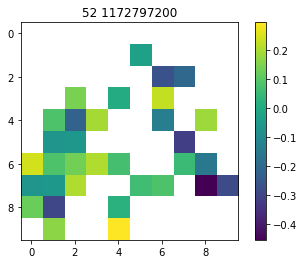

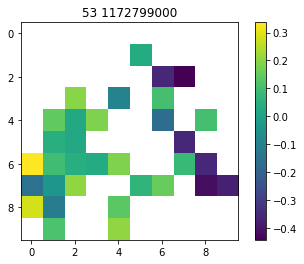

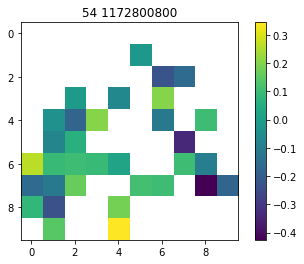

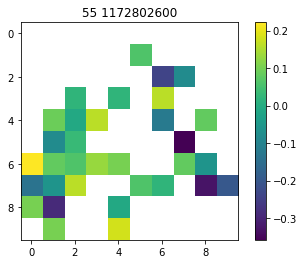

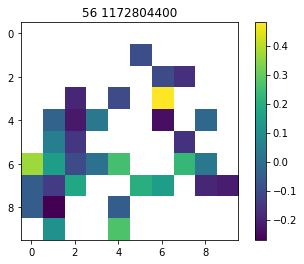

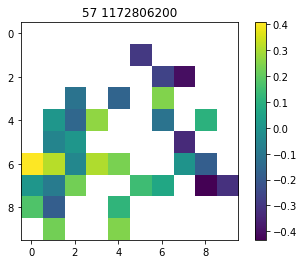

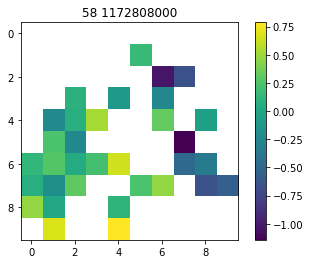

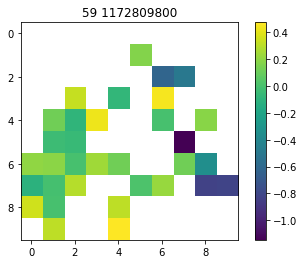

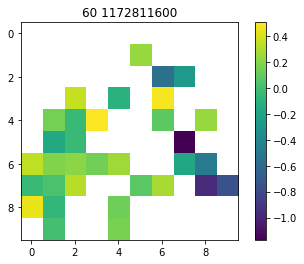

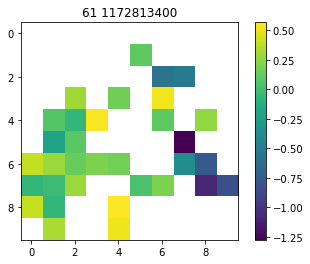

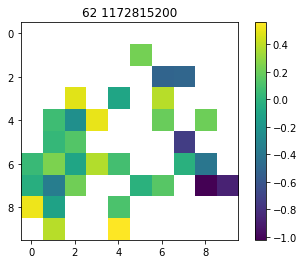

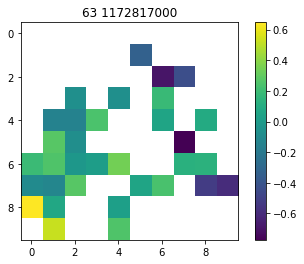

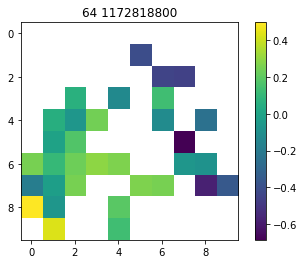

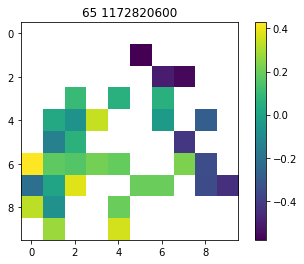

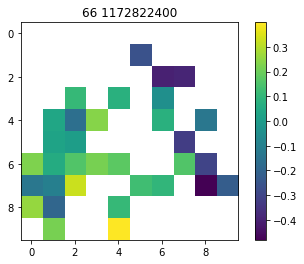

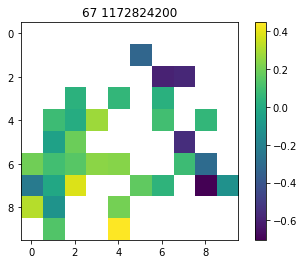

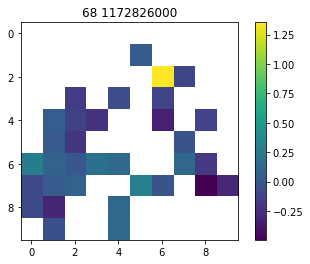

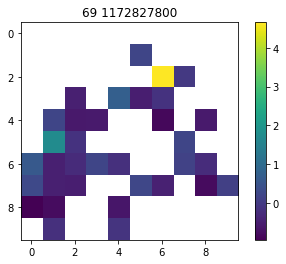

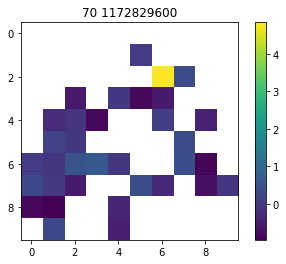

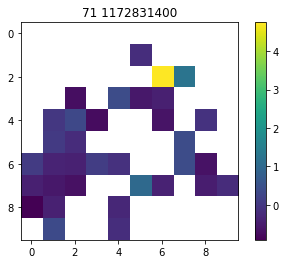

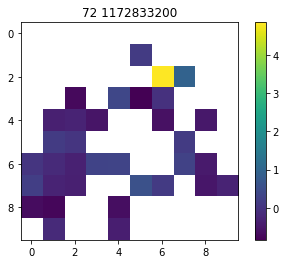

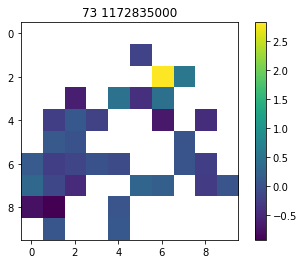

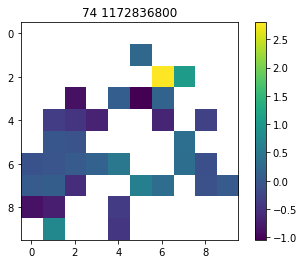

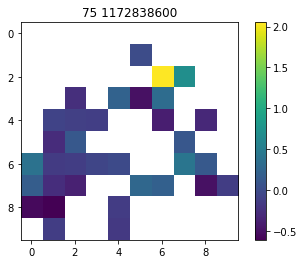

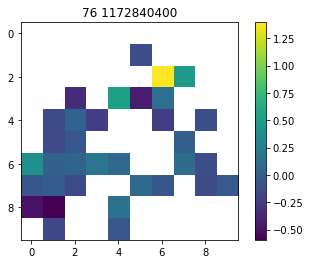

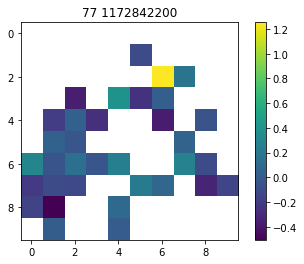

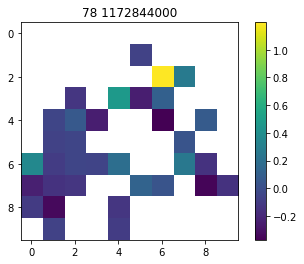

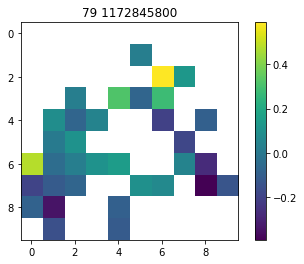

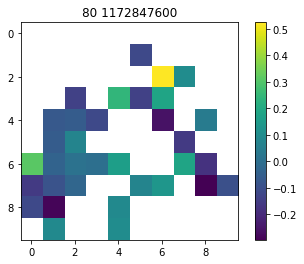

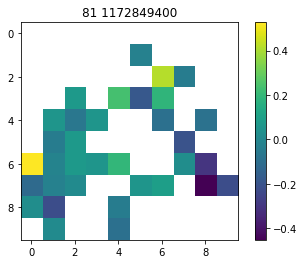

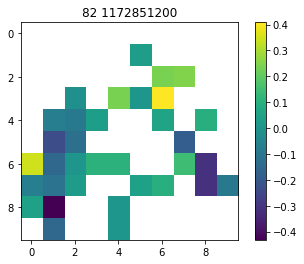

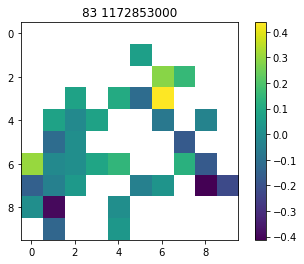

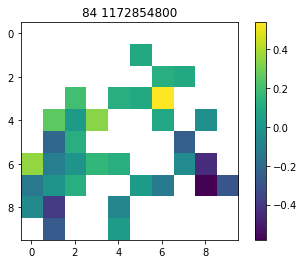

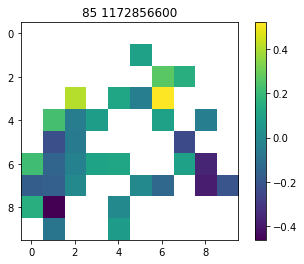

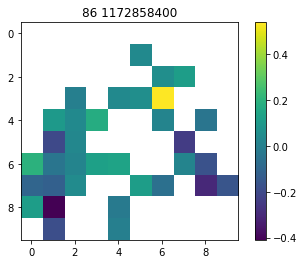

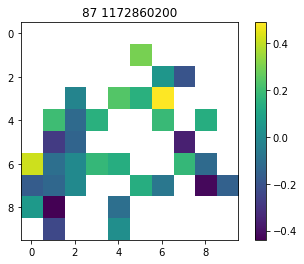

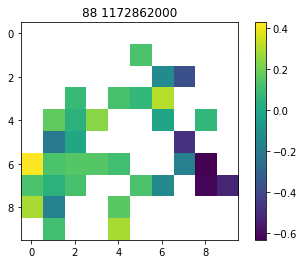

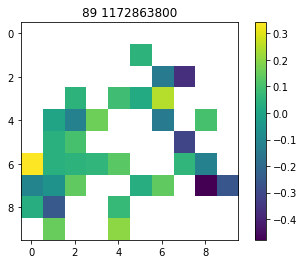

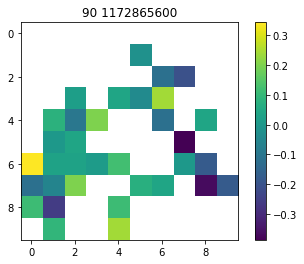

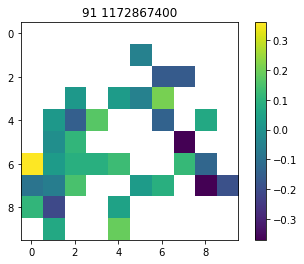

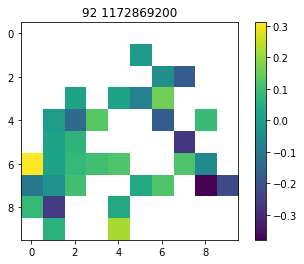

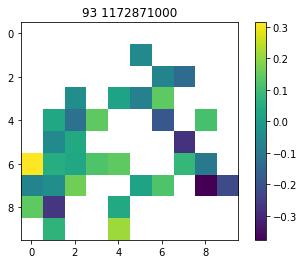

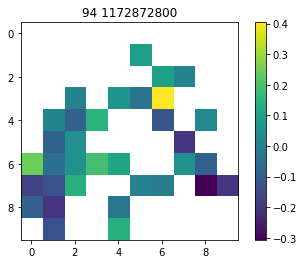

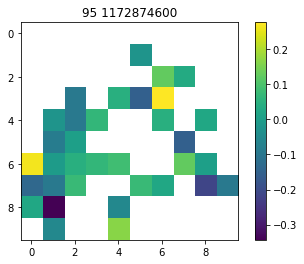

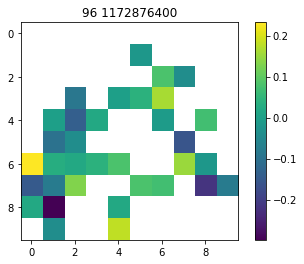

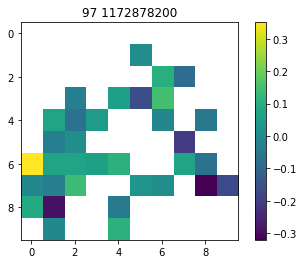

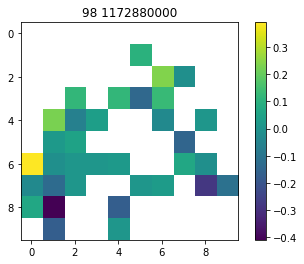

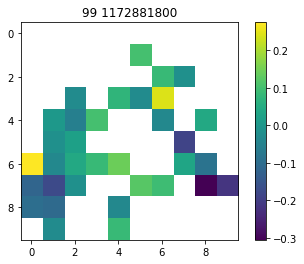

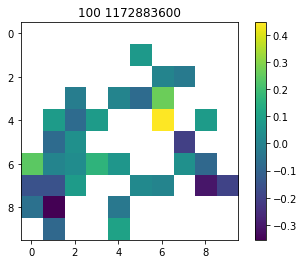

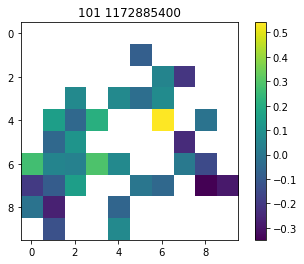

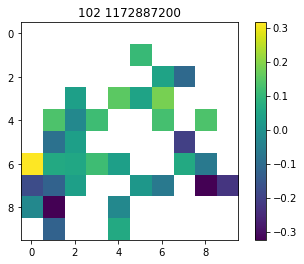

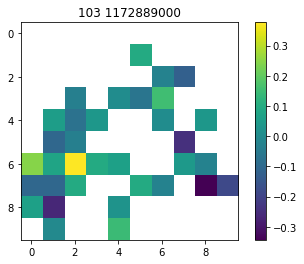

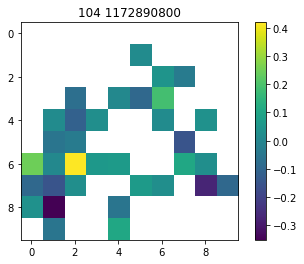

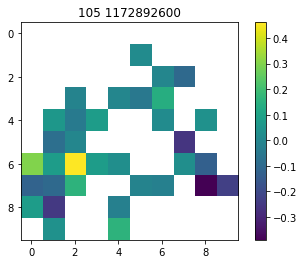

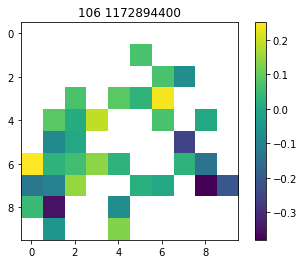

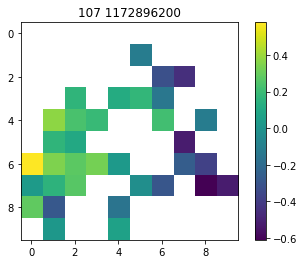

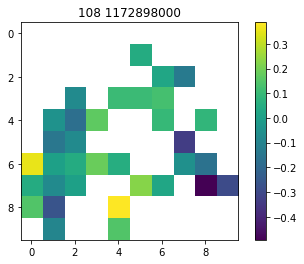

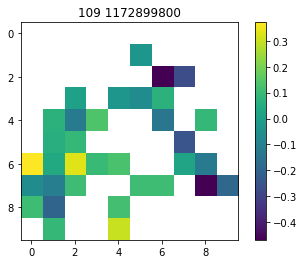

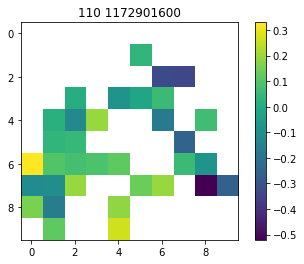

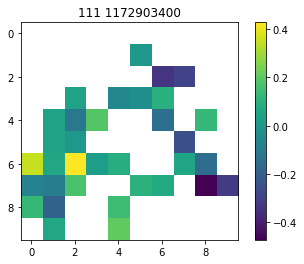

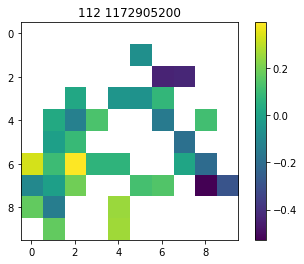

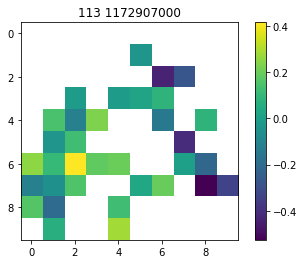

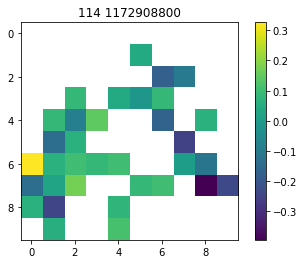

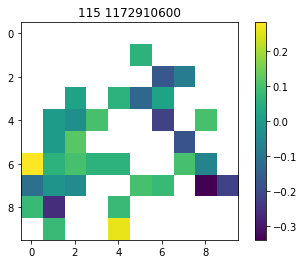

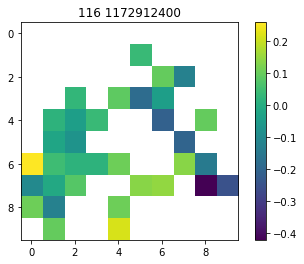

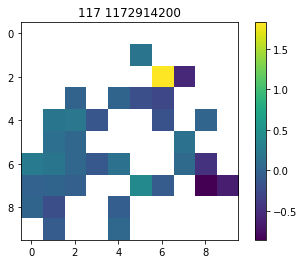

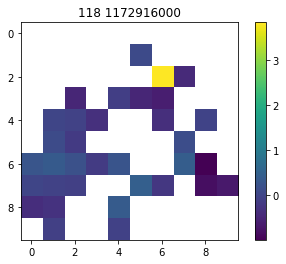

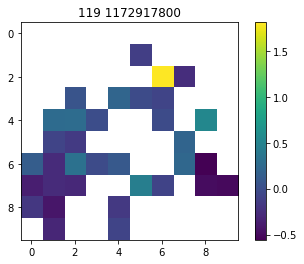

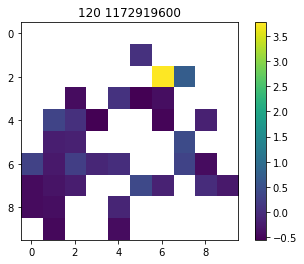

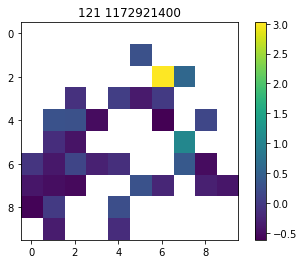

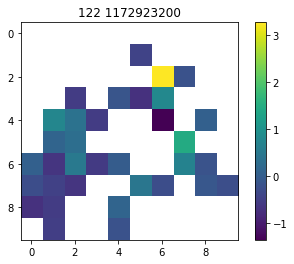

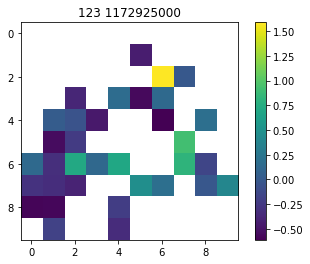

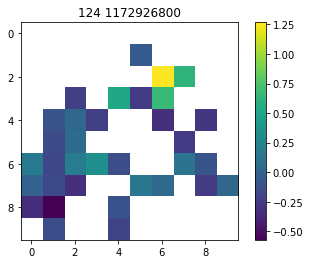

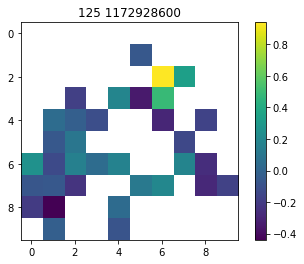

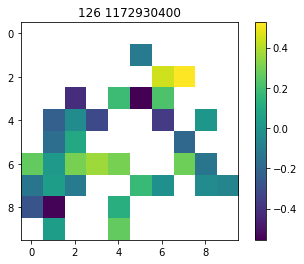

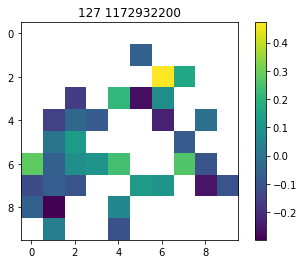

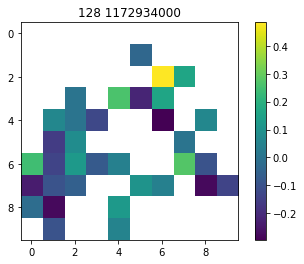

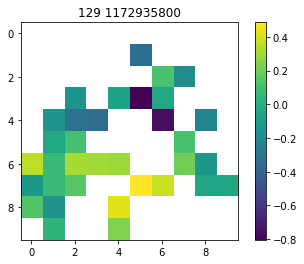

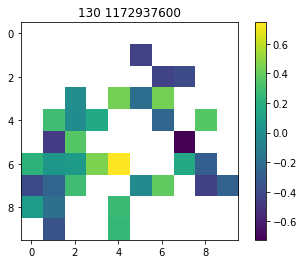

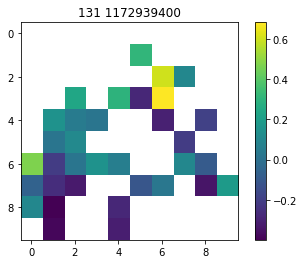

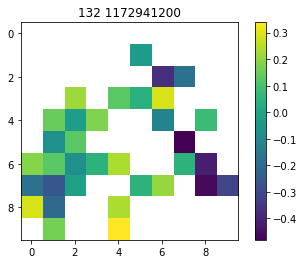

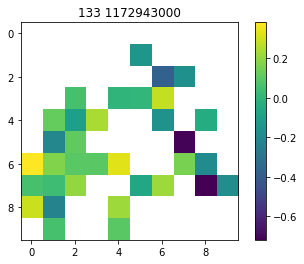

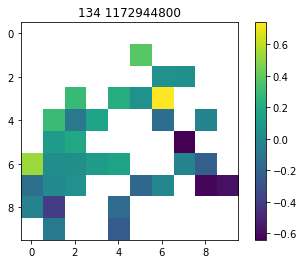

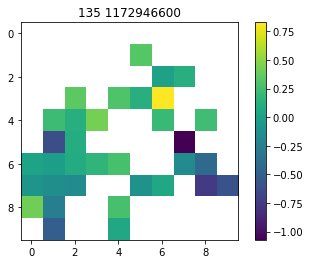

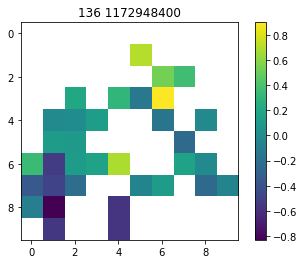

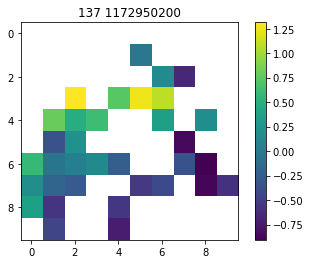

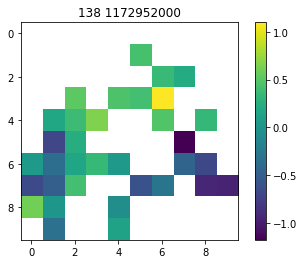

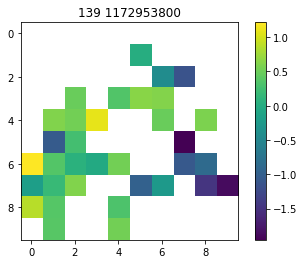

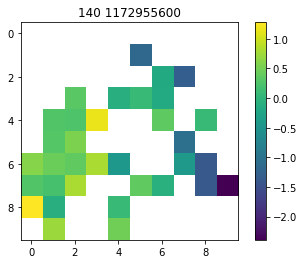

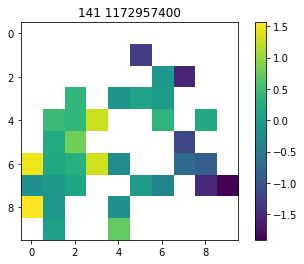

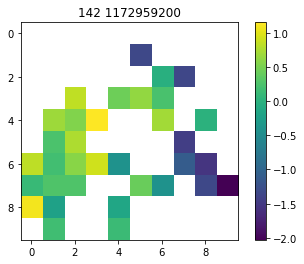

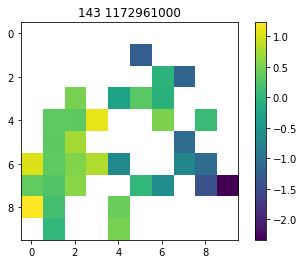

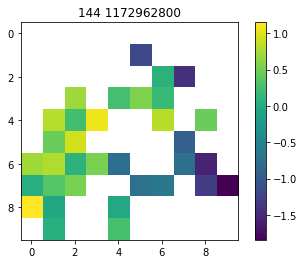

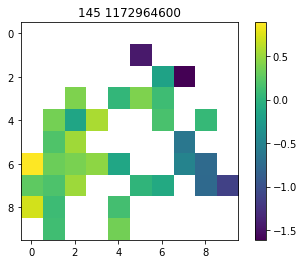

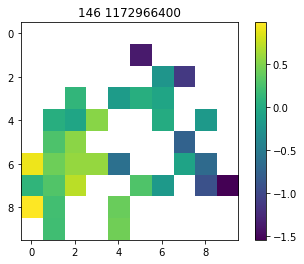

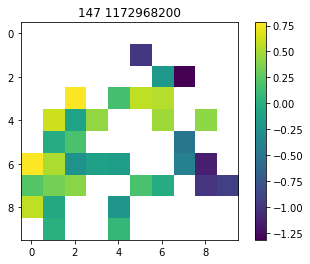

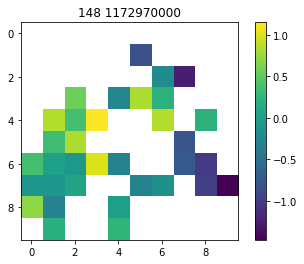

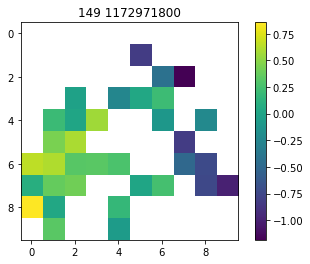

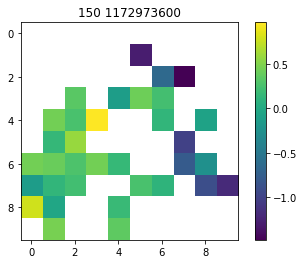

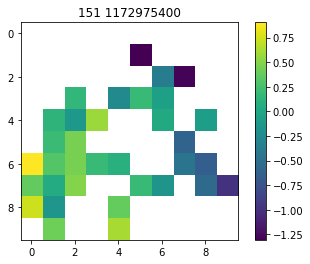

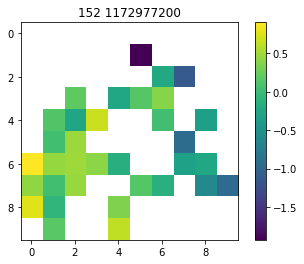

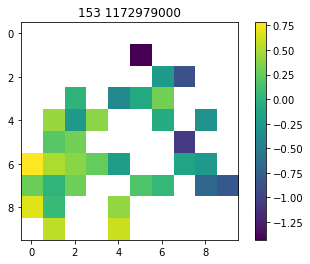

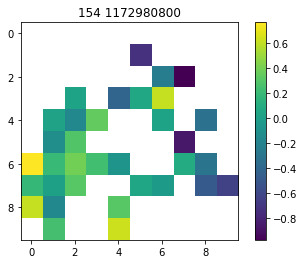

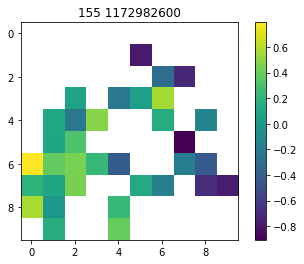

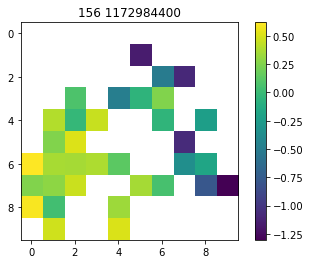

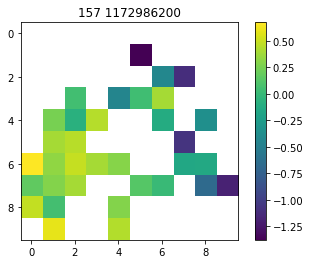

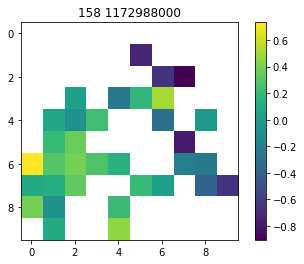

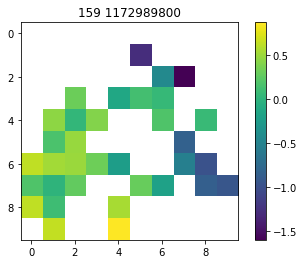

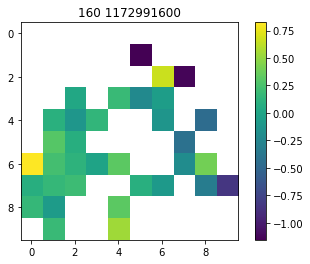

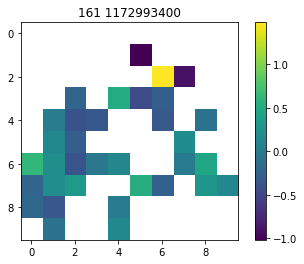

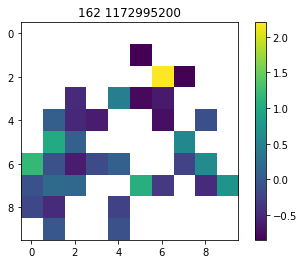

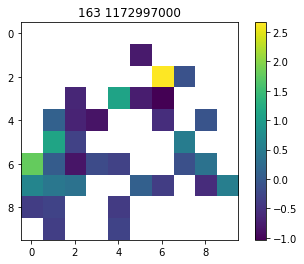

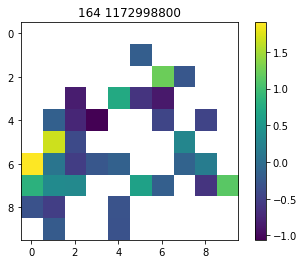

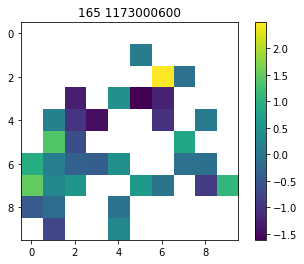

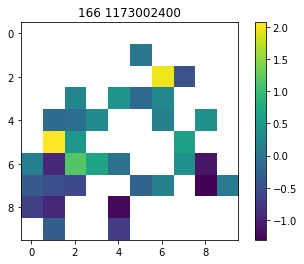

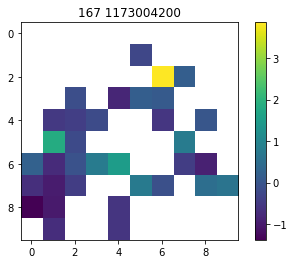

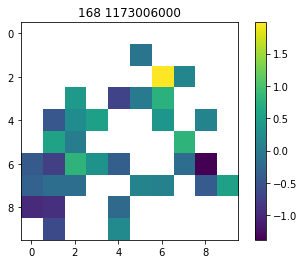

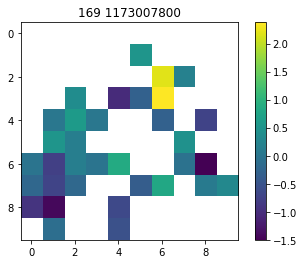

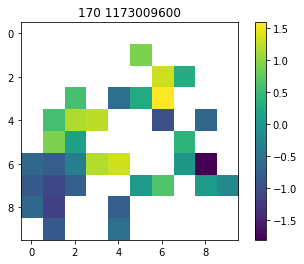

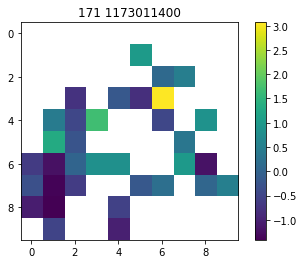

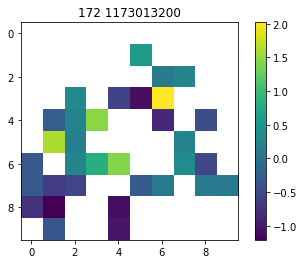

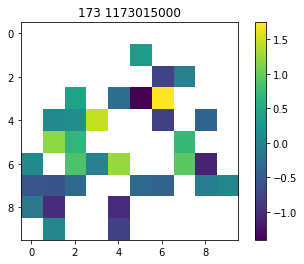

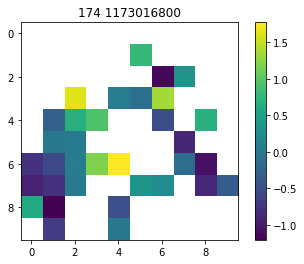

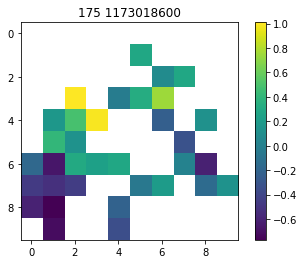

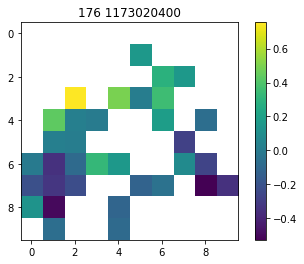

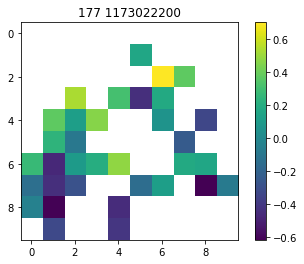

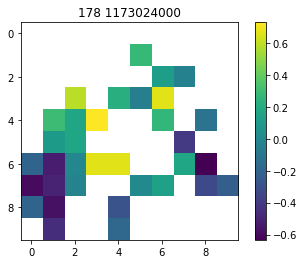

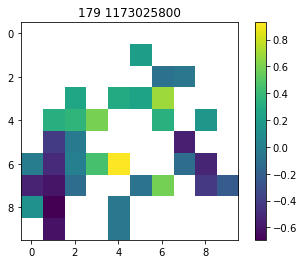

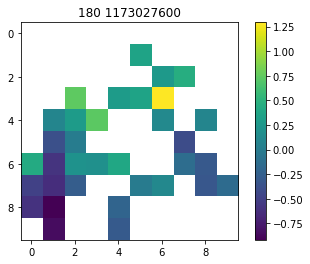

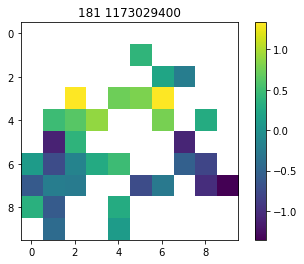

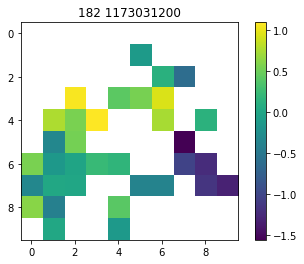

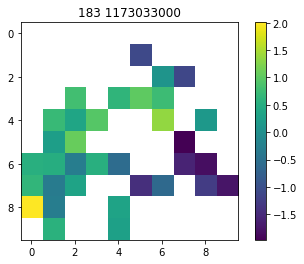

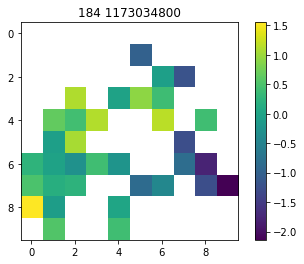

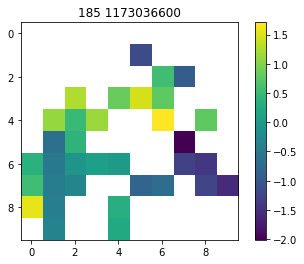

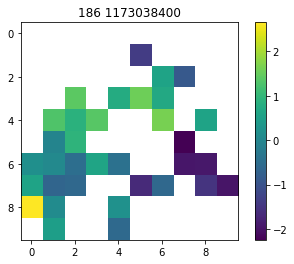

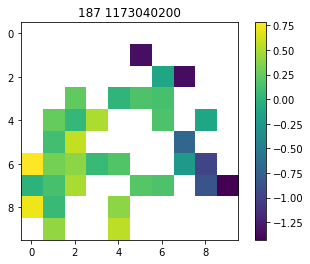

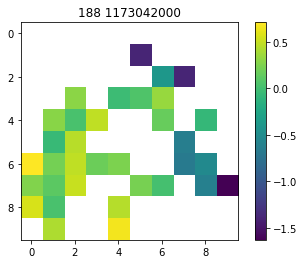

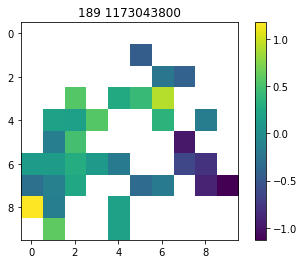

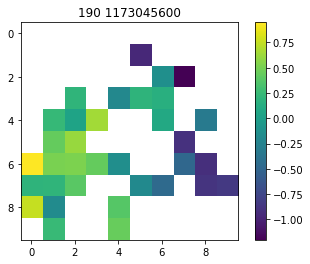

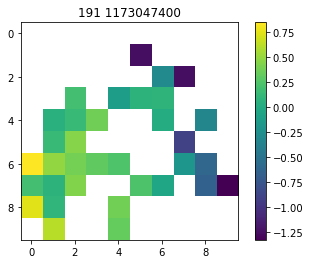

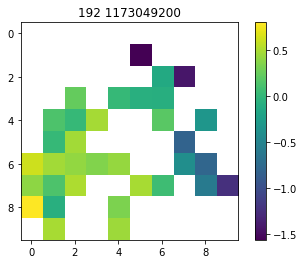

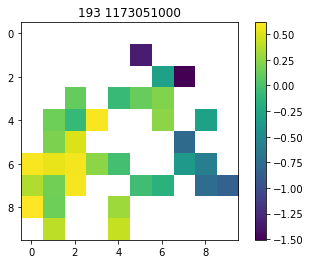

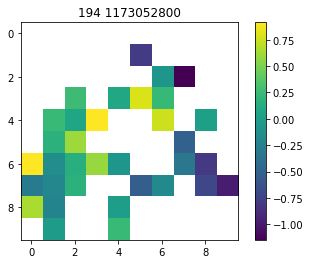

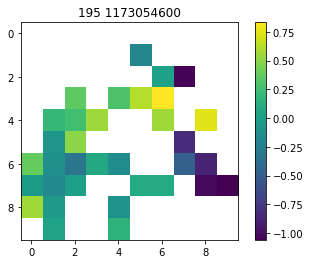

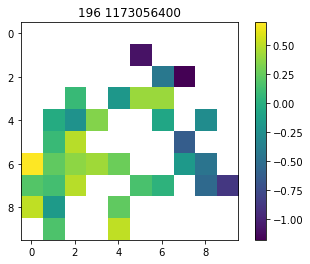

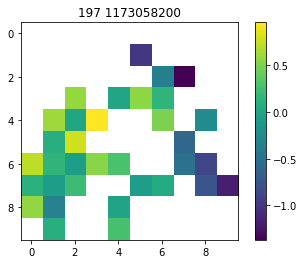

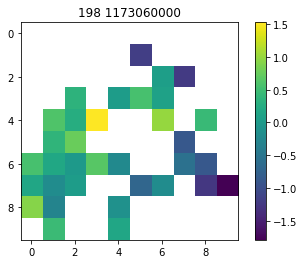

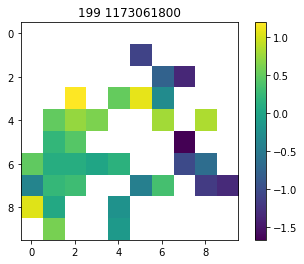

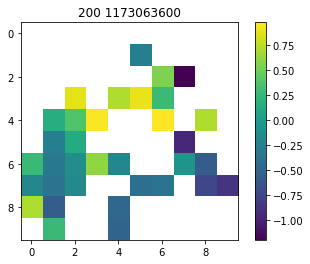

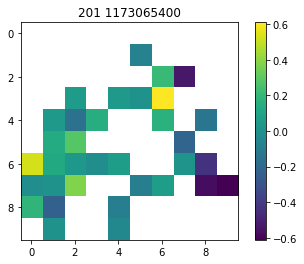

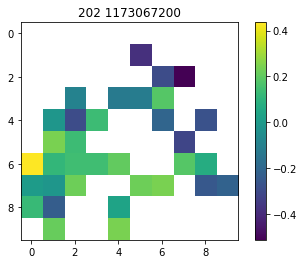

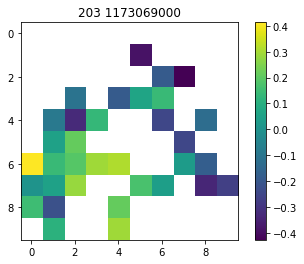

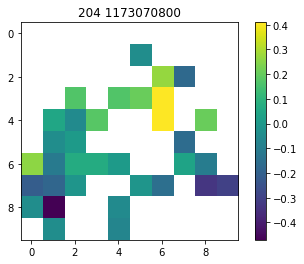

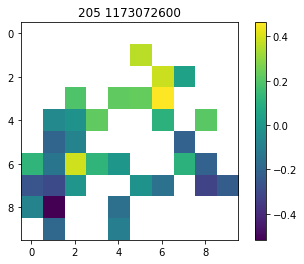

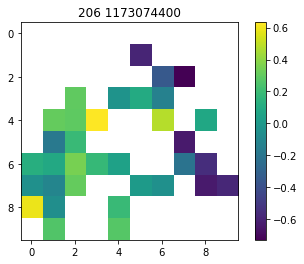

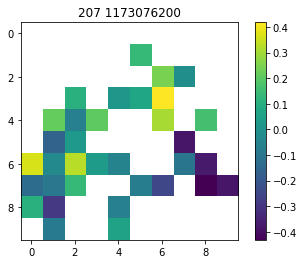

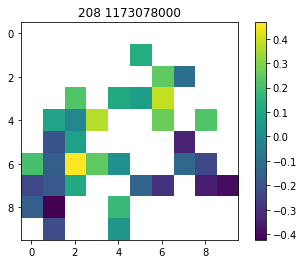

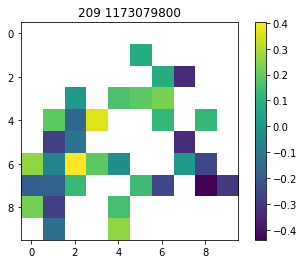

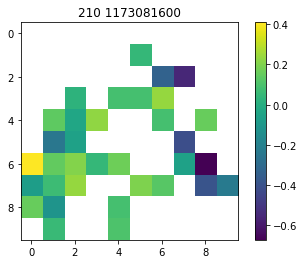

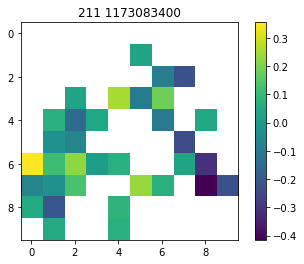

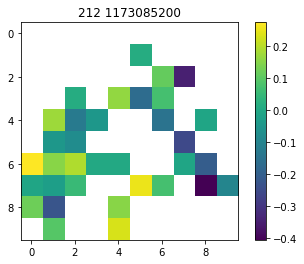

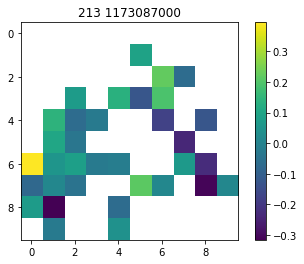

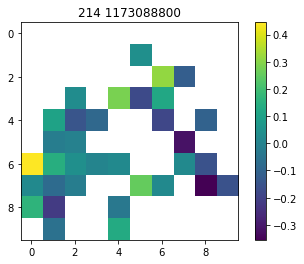

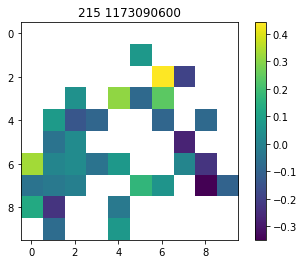

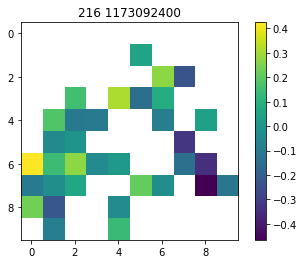

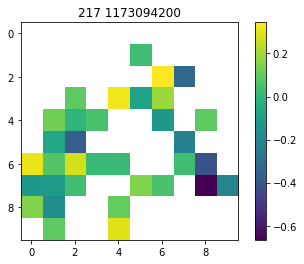

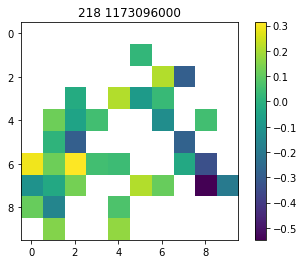

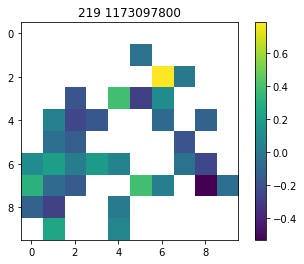

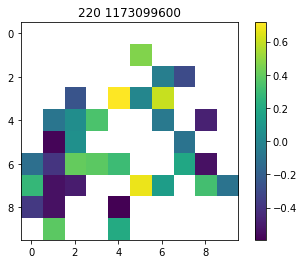

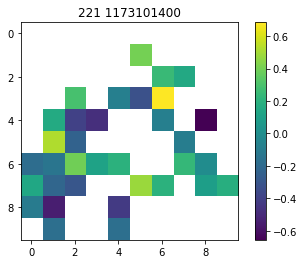

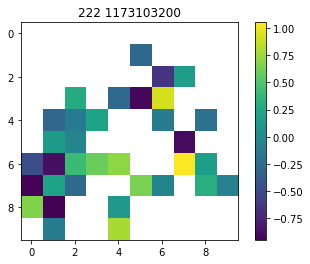

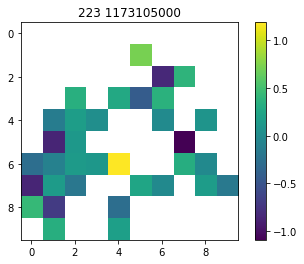

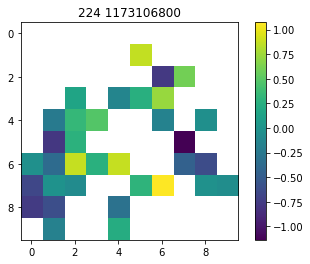

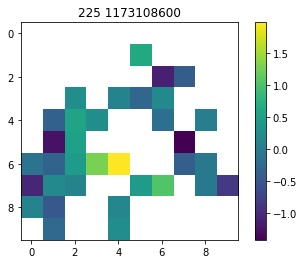

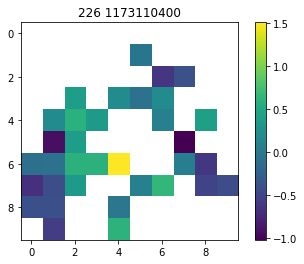

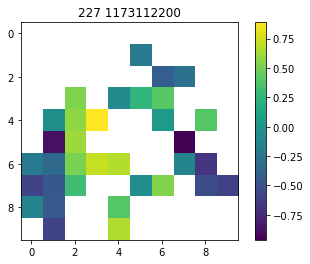

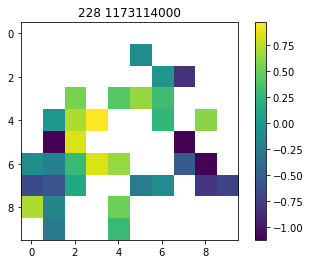

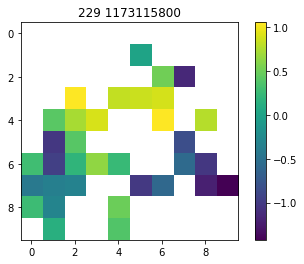

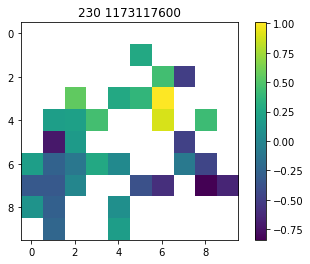

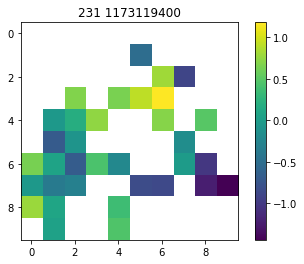

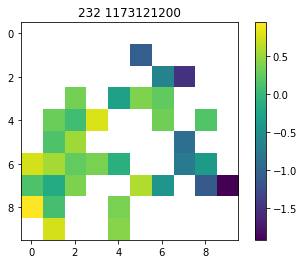

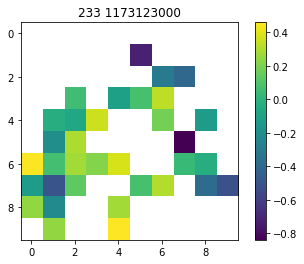

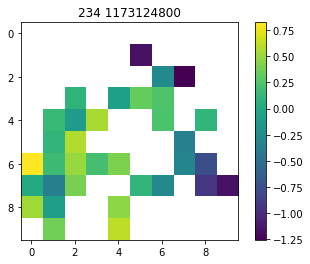

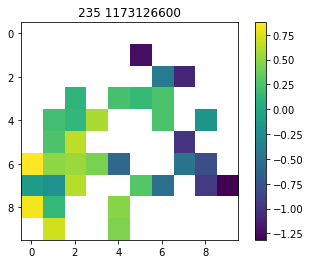

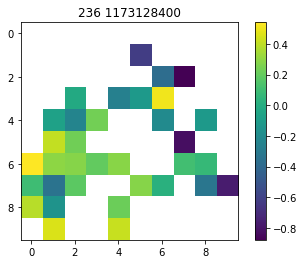

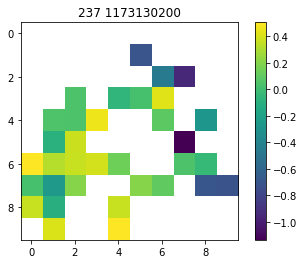

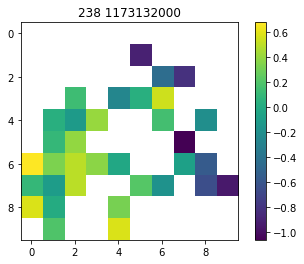

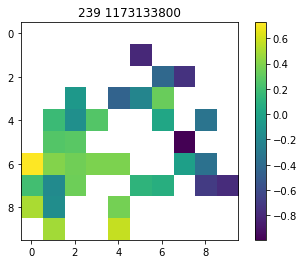

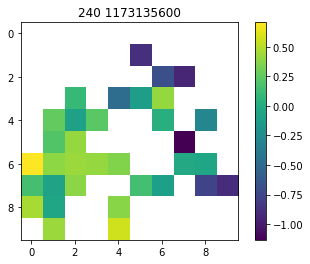

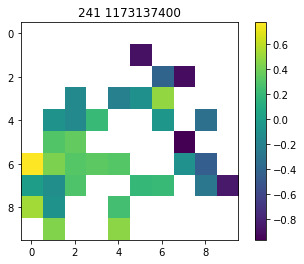

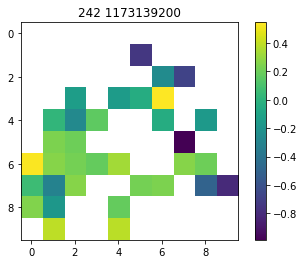

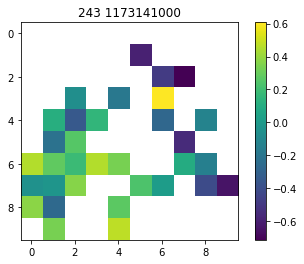

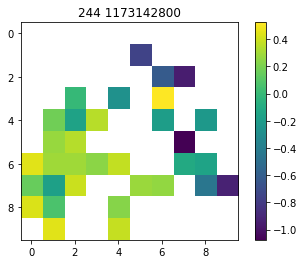

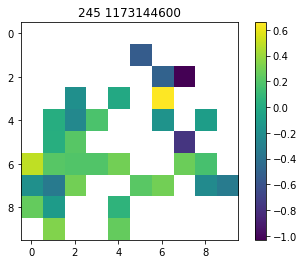

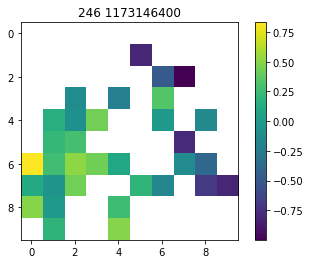

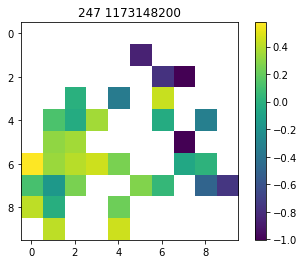

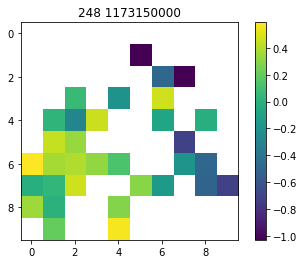

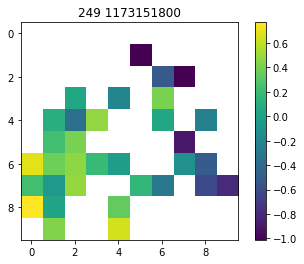

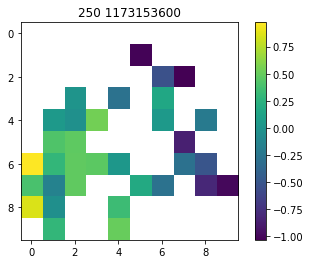

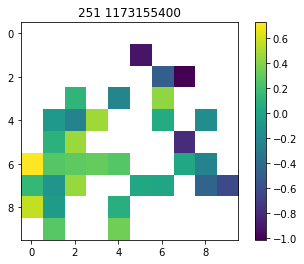

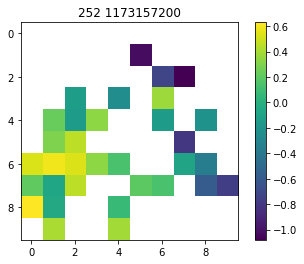

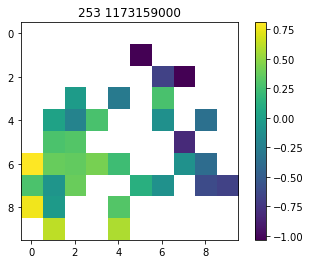

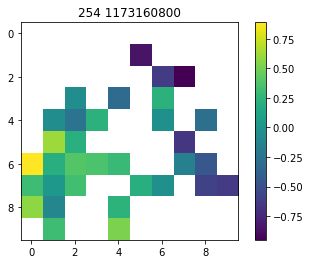

Error in callback <function flush_figures at 0x11e2ee280> (for post_execute):


KeyboardInterrupt: 

In [141]:

for i,temper in enumerate(temper_list):
    plt.figure()
    plt.title("{0} {1}".format(i,time_stamp[i]))
    plt.imshow(temper)
    plt.colorbar()
    plt.savefig("{0}.png".format(i))
    print(i)

In [89]:
for temper in temper_list:
    tmp = mean_temper(temper)
    print(tmp)

(33, 290.89)
(33, 290.85)
(33, 314.57)
(33, 309.33)
(33, 303.35999999999996)
(33, 285.54)
(33, 307.94)
(33, 298.71)
(33, 290.86)
(33, 305.05)
(33, 316.55)
(33, 302.57000000000005)
(33, 308.07999999999987)
(33, 290.03000000000003)
(33, 309.88)
(33, 314.25)
(33, 312.98)
(33, 311.22)
(33, 321.77)
(33, 310.79999999999995)
(33, 337.58)
(34, 329.78)
(34, 338.02)
(34, 354.18)
(34, 356.24)
(34, 355.11)
(34, 319.0800000000001)
(34, 301.94999999999993)
(34, 302.35)
(34, 308.11)
(34, 289.58000000000004)
(34, 283.03000000000003)
(34, 278.21000000000004)
(34, 276.3299999999999)
(34, 278.89000000000004)
(34, 284.38)
(34, 281.37999999999994)
(34, 282.00000000000006)
(34, 279.68)
(33, 271.13)
(33, 272.34000000000003)
(33, 273.81000000000006)
(33, 273.96)
(33, 278.81000000000006)
(33, 273.2399999999999)
(33, 270.73999999999995)
(33, 287.75)
(33, 295.28)
(33, 288.85)
(33, 280.5300000000001)
(33, 285.91000000000014)
(33, 288.22)
(33, 291.57000000000005)
(33, 308.65999999999997)
(33, 301.46999999999997)
(

In [125]:
for i in range(len(temper_list)):
    tmp = mean_temper(temper_list[i])
    if tmp[0] != 0:
        temper_list[i] -= tmp[1]/tmp[0]
        print(i,tmp[1])

0 290.89
1 290.85
2 314.57
3 309.33
4 303.35999999999996
5 285.54
6 307.94
7 298.71
8 290.86
9 305.05
10 316.55
11 302.57000000000005
12 308.07999999999987
13 290.03000000000003
14 309.88
15 314.25
16 312.98
17 311.22
18 321.77
19 310.79999999999995
20 337.58
21 329.78
22 338.02
23 354.18
24 356.24
25 355.11
26 319.0800000000001
27 301.94999999999993
28 302.35
29 308.11
30 289.58000000000004
31 283.03000000000003
32 278.21000000000004
33 276.3299999999999
34 278.89000000000004
35 284.38
36 281.37999999999994
37 282.00000000000006
38 279.68
39 271.13
40 272.34000000000003
41 273.81000000000006
42 273.96
43 278.81000000000006
44 273.2399999999999
45 270.73999999999995
46 287.75
47 295.28
48 288.85
49 280.5300000000001
50 285.91000000000014
51 288.22
52 291.57000000000005
53 308.65999999999997
54 301.46999999999997
55 298.24999999999994
56 222.08
57 213.59999999999994
58 253.52
59 265.18
60 265.06
61 265.1
62 274.92
63 260.78
64 258.19
65 259.43000000000006
66 266.67
67 282.22999999999996

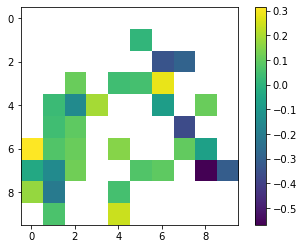

In [137]:
plt.imshow(temper_list[300])
plt.colorbar()

In [88]:
ori_temper_list = copy.deepcopy(temper_list)

In [86]:
ori_temper_list[0] is temper_list[0]

False

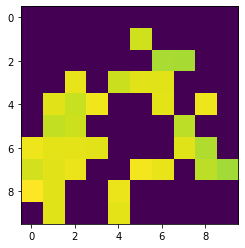

In [94]:
plt.imshow(ori_temper_list[3])

In [52]:
print(len(time_stamp),len(temper_list))

337 336


In [124]:
def convert_nan(temper):
    for i in range(len(temper)):
        for j in range(len(temper)):
            if temper[i][j] == 0:
                temper[i][j] = np.nan
    return temper

In [122]:
def mean_temper(temper):
    sum = 0
    num = 0
    for i in range(len(temper)):
        for j in range(len(temper)):
            if np.isnan(temper[i][j]) or temper[i][j] == 0:
                pass
            else:
                num += 1
                sum += temper[i][j]
    return (num,sum)